Michael Goforth
CAAM 550 
HW 3
9/15/2021

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Problem 2c

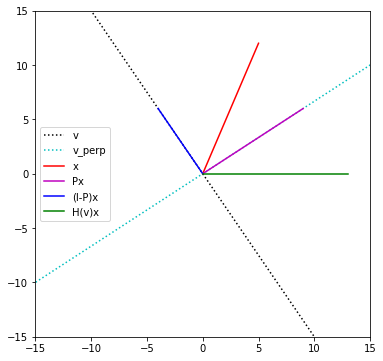

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

# plot span(v)
v = np.array([-8, 12])
vx = [v[0] * i for i in np.linspace(-10, 10)]
vy = [v[1] * i for i in np.linspace(-10, 10)]
plt.plot(vx, vy, 'k:', label='v')

# plot span(v_perp)
v_p = np.array([12, 8])
vx_p = [v_p[0] * i for i in np.linspace(-10, 10)]
vy_p = [v_p[1] * i for i in np.linspace(-10, 10)]
plt.plot(vx_p, vy_p, 'c:', label='v_perp')

# plot x vector
x = np.array([5, 12])
plt.plot([0, x[0]], [0, x[1]], 'r', label='x')

# plot Px
P = np.array([[9/13, 6/13], [6/13, 4/13]])
px = P @ x
plt.plot([0, px[0]], [0, px[1]], 'm', label='Px')

# plot (I - P)x
IPx = (np.identity(2) - P) @ x
plt.plot([0, IPx[0]], [0, IPx[1]], 'b', label='(I-P)x')

# plot H(v)x
H = np.array([[5/13, 12/13], [12/13, -5/13]])
Hx = H @ x
plt.plot([0, Hx[0]], [0, Hx[1]], 'g', label='H(v)x') 

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.legend()


### Problem 3b

In [1]:
A = np.array([[1, 2, 3], [-1, 2, 1], [0, 1, 1]])
Q, R = np.linalg.qr(A)
print("Q = " + str(Q))
print("R = " + str(R))

Q = [[-0.70710678 -0.66666667 -0.23570226]
 [ 0.70710678 -0.66666667 -0.23570226]
 [-0.         -0.33333333  0.94280904]]
R = [[-1.41421356e+00  6.66133815e-16 -1.41421356e+00]
 [ 0.00000000e+00 -3.00000000e+00 -3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.14863726e-16]]


### Problem 4

In [2]:
def multiQR(A, j=10):
    '''Function as described in problem 4 of HW3.  
    
    Parameters
    ----------
    A : np.array
        matrix to be decomposed
    j : value (optional, default = 10)
        number of iterations of QR decomposition
           
    Returns
    -------
    A_j : np.array
          resulting matrix.  A_j = (Q_0 Q_1 ... Q_j-1)^T A_0 (Q_0 Q_1 ... Q_j-1)
           
    Michael Goforth
    CAAM 550
    Rice University
    September 15, 2021
    '''
    
    for i in range(j):
        Q, R = np.linalg.qr(A)
        A = R @ Q
    return A

In [54]:
# Matrix trial 1
A = np.array([[3, -5], [-5, 3]])
A10 = multiQR(A, 10)
A11 = multiQR(A, 11)

print('Matrix A:')
print(str(A))
print('Eigenvalues: ' + str(np.linalg.eig(A)[0]))
print('A after 10 iterations: ')
print(str(A10))
print('A after 11 iterations: ')
print(str(A11))

Matrix A:
[[ 3 -5]
 [-5  3]]
Eigenvalues: [ 8. -2.]
A after 10 iterations: 
[[ 8.00000000e+00 -9.53674316e-06]
 [-9.53674316e-06 -2.00000000e+00]]
A after 11 iterations: 
[[ 8.00000000e+00 -2.38418579e-06]
 [-2.38418579e-06 -2.00000000e+00]]


In [72]:
# Matrix trial 2
B = np.array([[2, -5], [1, 3]])
B10 = multiQR(B, 10000)
B11 = multiQR(B, 10001)

print('Matrix B:')
print(str(B))
print('Eigenvalues: ' + str(np.linalg.eig(B)[0]))
print('B after 100 iterations: ')
print(str(B10))
print('B after 101 iterations: ')
print(str(B11))

Matrix B:
[[ 2 -5]
 [ 1  3]]
Eigenvalues: [2.5+2.17944947j 2.5-2.17944947j]
B after 100 iterations: 
[[ 0.44712643 -2.81102877]
 [ 3.18897123  4.55287357]]
B after 101 iterations: 
[[ 4.52568494  2.61711554]
 [-3.38288446  0.47431506]]


In [59]:
# Matrix trial 3
C = np.array([[3, 2], [7, 3]])
C10 = multiQR(C, 10)
C11 = multiQR(C, 11)

print('Matrix C:')
print(str(C))
print('Eigenvalues: ' + str(np.linalg.eig(C)[0]))
print('A after 10 iterations: ')
print(str(C10))
print('A after 11 iterations: ')
print(str(C11))

Matrix C:
[[3 2]
 [7 3]]
Eigenvalues: [ 6.74165739 -0.74165739]
A after 10 iterations: 
[[ 6.74165739e+00 -5.00000000e+00]
 [ 1.61551876e-09 -7.41657388e-01]]
A after 11 iterations: 
[[ 6.74165739e+00  5.00000000e+00]
 [ 1.77725054e-10 -7.41657387e-01]]
